### Homework Assignment: Discrete Distributions

---

#### Problem 1: Binomial Simulation of Card Drawing
- **Objective**: Simulate the probability of drawing a red or black card from a standard deck of 52 playing cards.
- **Task**:
  1. Use NumPy's binomial distribution function to simulate 100 trials of drawing a card.
  2. Assume the probability of drawing a red card is 0.5 (since there are 26 red and 26 black cards).
  3. Count the number of times a red card is drawn.
  4. Calculate the empirical probability of drawing a red card based on the simulation.
  5. Compare this probability with the assumed theoretical probability (i.e., is it around 0.5?).

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import seaborn as sns

In [73]:
p_red_draw = 0.5
n_cards = 52
n_experiments = 100
n_red = rnd.binomial(n=n_cards, p=p_red_draw, size=n_experiments)
p_red = n_red/52
final_prob = sum(p_red)/len(p_red)
print(f'The probability of drawing a red card based on the simulation is {final_prob}, while the theoretical probability is 0.5')

The probability of drawing a red card based on the simulation is 0.49442307692307713, while the theoretical probability is 0.5


#### Problem 2: Binomial vs. Gaussian Approximation
- **Objective**: Compare a simulated binomial distribution with its Gaussian approximation.
- **Task**:
  1. Re-do the above simulation 2000 times, storing the number of red cards drawn each time (might be a good time to write a function)
  2. Plot the distribution of number of red cards drawn.
  3. Compute the mean and standard deviation of the simulated distribution.
  4. Calculate the mean and standard deviation from the Gaussian approximation formulae; how do these compared with those from the simulations?


In [48]:
def draw_card(n_experiments) :
    p_red_draw = 0.5
    n_cards = 52
    n_red = rnd.binomial(n=n_cards, p=p_red_draw, size=n_experiments)
    return n_red

The mean number of red cards drawn out of 2000 simulations was 26.1315 with a standard deviation of 3.5690625870107686
For comparison, a perfect Gausian distribution would have a mean of 26.0 with a standard deviation of 3.605551275463989


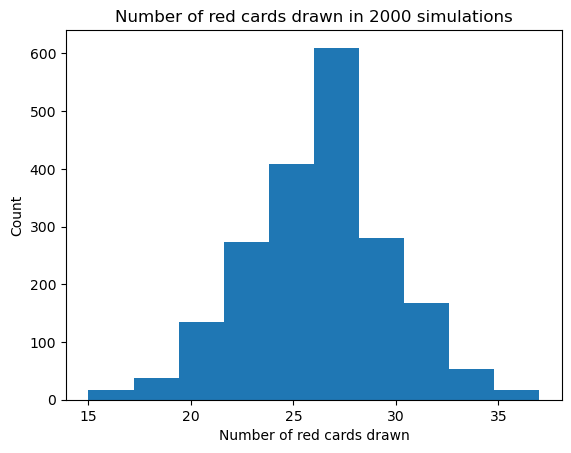

In [80]:
red_count = draw_card(2000)
plt.hist(red_count)
plt.title('Number of red cards drawn in 2000 simulations')
plt.ylabel('Count')
plt.xlabel('Number of red cards drawn')
mean_red = np.mean(red_count)
std_red = np.std(red_count)
print(f'The mean number of red cards drawn out of 2000 simulations was {mean_red} with a standard deviation of {std_red}')
n = 52
p = 0.5
mean_gaus = n * p
std_gaus = (n * p * (1-p))**0.5
print(f'For comparison, a perfect Gausian distribution would have a mean of {mean_gaus} with a standard deviation of {std_gaus}')

#### Problem 3: Simulating an Election in a Fictional Country
- **Objective**: Simulate election results based on polling data and voter turnout estimates in a fictional country with 4 states. The winner is by overall popular vote (there is no electoral college).
- **Task**:
  1. Assume each state has a different number of voters and different probabilities for voting for candidate A or B, based on fictional polling data (make up whatever polling data you want).
  2. Also assume *different voter turnout percentages* for each state (make these up too).
  3. Use the binomial distribution to simulate the voting process in each state.
  4. Calculate the total votes for each candidate and determine the winner.
  5. Perform the simulation a "large number" of times and plot the distribution along with a vertical line showing where the original outcome was.

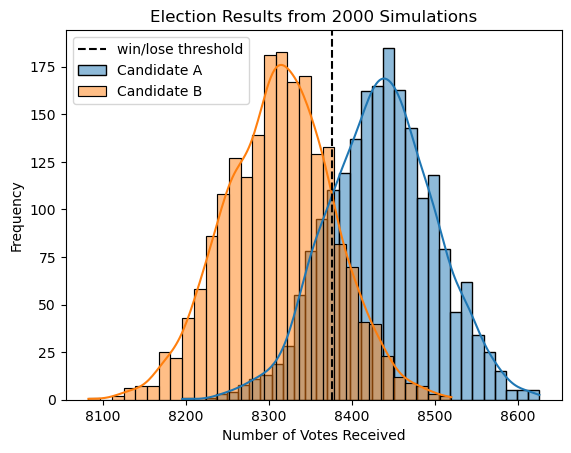

In [132]:
state_population = np.array([5000, 6000, 7000, 8000])
state_poll_A = np.array([0.53, 0.48, 0.52, 0.49])
state_poll_B = np.array([0.47, 0.52, 0.48, 0.51])
voter_turnout = np.array([.75, .8, .6, .5])
active_voters = state_population * voter_turnout
num_simulations = 2000
vote_result_A = np.zeros(num_simulations)
vote_result_B = np.zeros(num_simulations)
total_votes = sum(active_voters)
winning_line = (total_votes/2) + 1
for i in range(num_simulations):
    total_votes_A = 0
    total_votes_B = 0
    for voters, poll_A in zip(active_voters, state_poll_A):
        votes_A = np.random.binomial(voters, poll_A)
        total_votes_A += votes_A
    for voters, poll_B in zip(active_voters, state_poll_B):
        votes_B = np.random.binomial(voters, poll_B)
        total_votes_B += votes_B
    vote_result_A[i] = total_votes_A
    vote_result_B[i] = total_votes_B
sns.histplot(vote_result_A, label='Candidate A', kde=True)
sns.histplot(vote_result_B, label='Candidate B', kde=True)
plt.title('Election Results from 2000 Simulations')
plt.xlabel('Number of Votes Received')
plt.ylabel('Frequency')
plt.axvline(x=winning_line, color='k', linestyle='--', label='win/lose threshold')
plt.legend()
plt.show()

#### Problem 4: Effects of Sample Size on the Distribution of Sums
- **Objective**. To see how the distribution of sums of discrete variables approachs a continuous Gaussian distribution with increasing addends. 
- **Task**.
  1. Rewrite the dice code from the tutorial to just store the sum on each set of rolls (rather than incrementing the counts of possible sums as we did in the tutorial).
  2. Write a function that takes 1) the number of dice to roll and 2) the number of rolls to do as input arguments, and returns a vector of the sums for each of the rolls as output.
  3. Run the code for (``for()``)  2, 4, 8, 16, and 32 dice; the number of rolls (experiments) should be "large".
  4. Plot the results as overlaid KDEs like we did for the coin flips in the tutorial.
  5. Briefly describe how the sampling distributions change as the number of experiments (rolls) increases.



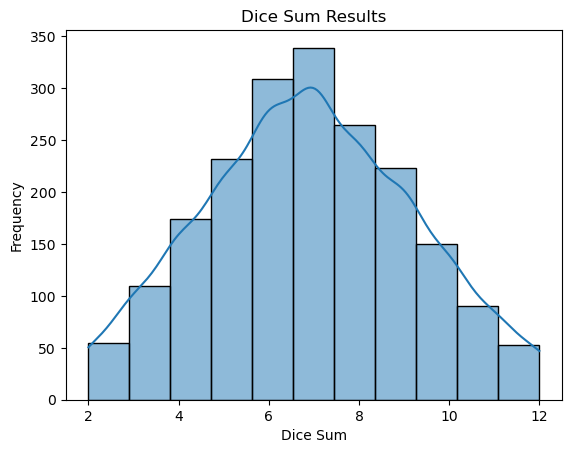

In [171]:
num_dice = 2
num_trials = 2000
sums_dice = np.zeros(num_trials)
for i in range(num_trials) :
    roll_dice = np.random.randint(1, 7, size=num_dice)
    sum_roll = np.sum(roll_dice)
    sums_dice[i] = sum_roll
sns.histplot(sums_dice, kde=True, bins=11)
plt.xlabel('Dice Sum')
plt.ylabel('Frequency')
plt.title('Dice Sum Results')
plt.show()

In [170]:
def dice_roll(num_dice, num_trials) :
    sums_dice = np.zeros(num_trials)
    for i in range(num_trials) :
        roll_dice = np.random.randint(1, 7, size=num_dice)            
        sum_roll = np.sum(roll_dice)
        sums_dice[i] = sum_roll
    return sums_dice

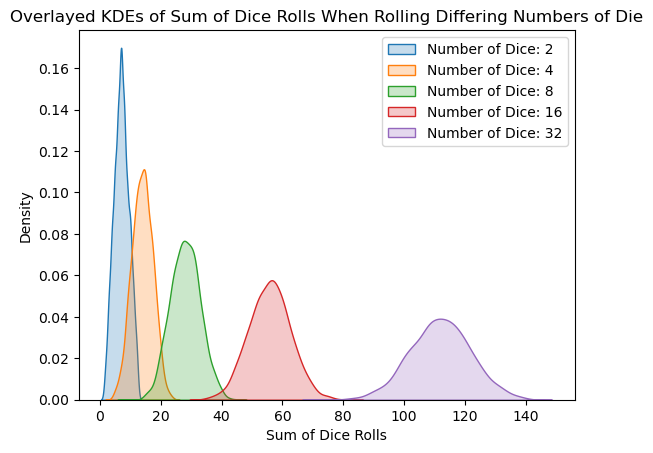

In [187]:
num_of_dice = [2, 4, 8, 16, 32]
for size in num_of_dice:
    dice = dice_roll(size, 2000)
    sns.kdeplot(dice, label=f'Number of Dice: {size}', alpha=0.25, fill=True)
plt.title('Overlayed KDEs of Sum of Dice Rolls When Rolling Differing Numbers of Die')
plt.xlabel('Sum of Dice Rolls')
plt.ylabel('Density')
plt.legend()
plt.show()

As the number of dice being rolled increases, the sampling distributions begin to result in larger sums of numbers and become more and more spread out as the greater number of die being rolled results in greater variability in possible sum outcomes.